In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist

In [16]:
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()
train_data = train_data.reshape(60000,28,28,1)/255.0
test_data = test_data.reshape(10000,28,28,1)/255.0
#(batch,height,width,channels) channels = 1 for gray scale 
# 3 for RGB 4 for RGBA
# it is divided by 255.0 for pixel normalization so the value ranges between 
#0(black) and 1(white)

In [31]:
model = Sequential([
    Conv2D(32,(3,3),strides=2,activation='relu',input_shape=(28,28,1)),
    Conv2D(64,(3,3),strides=2,activation='relu'),
    Conv2D(128,(3,3),strides=2,activation='relu'),
    Conv2D(10,(2,2),activation='linear'),
    Flatten()
])
#The (3,3) refers to the kernel size (also called filter size) - it's the dimensions of the small window that slides over your image. A 3×3 
# kernel looks at a 3×3 patch of pixels at once to detect features like edges, curves, or patterns.
#Strides control how many pixels the filter jumps when moving across the image. A stride of 2 means the filter moves 2 pixels at a time, effectively downsampling the image and reducing its spatial dimensions.

/home/vihan-tandon/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [33]:
model.fit(train_data,train_labels,epochs=5,validation_data=(test_data,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9453 - loss: 0.1858 - val_accuracy: 0.9777 - val_loss: 0.0708
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0620 - val_accuracy: 0.9826 - val_loss: 0.0542
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9881 - val_loss: 0.0422
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9859 - val_loss: 0.0479
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9867 - val_loss: 0.0411


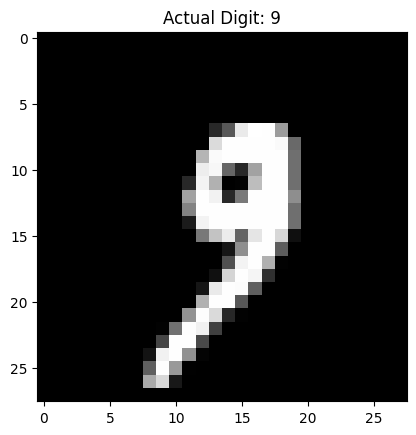

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model predicted: 9
Actual digit: 9
Prediction confidence: 802.34%


In [43]:
image_index = 1000
test_image = test_data[image_index]
test_label = test_labels[image_index]

plt.imshow(test_image.reshape(28,28),cmap='gray')
plt.title(f'Actual Digit: {test_label}')
plt.show()

prediction = model.predict(test_image.reshape(1,28,28,1))
predict_digit = np.argmax(prediction)

print(f'Model predicted: {predict_digit}')
print(f'Actual digit: {test_label}')
print(f'Prediction confidence: {prediction[0][predict_digit]:.2%}')